# **Lab 5: Quadrature**
**Fabián Levicán**

# **Abstract**

This is the fifth lab in the course DD2363 Methods in Scientific Computing. It is about using Jupyter to implement four quadrature methods for approximating the integrals of continuous functions with domain in $\mathbb{R}$ and $\mathbb{R}^2$, specifically in the unit interval and the reference triangle. Some objectives may be to understand how constructing a quadrature method to be exact for polynomials up to a certain degree also makes it a good approximation for arbitrary continuous functions, and to be introduced to the applications of probability theory related to the Monte Carlo methods. The functions implemented are TwoPtGaussQuad1D, ThreePtMidpointQuad2D, MCQuad1D, and McQuad2D. The methods are then tested to be exact for polynomials up to a certain degree, and are also tested for a certain tendency in their convergence rates.

#**About the code**

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Fabián Levicán (fils2@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import math
import time
import matplotlib.pyplot as plt
import numpy as np

# **Introduction**

Approximating the integral of a continuous function is equivalent to approximating some area or some volume, and thus this problem is ages old. There exist many quadrature methods that have been devoloped for this purpose. In particular, if we need these approximations on an interval in 1D, or on a triangle in 2D (i. e., for a finite elements method), we can use an affine transformation, usually with a constant Jacobian, to obtain it if we can obtain an approximation on the unit interval, or on the reference triangle. More details on this can be found in the lecture notes.

The Gauss quadrature method consists in finding $p$ points and weights such that the weighted sum of the evaluations of these points is exactly the integral (on an interval) of an arbitrary polynomial of degree up to $2p - 1$. The Monte Carlo quadrature method consists in finding the average of the evaluations of a certain quantity of points, and then multiplying this average by the measure of the domain. Intuitively, this yields the integral of a function over the domain. The edge midpoint quadrature method is self explanatory, although justification is needed for why it's exact for polynomials up to a certain degree. More details on the theory behind all of these quadrature methods can be found in the lecture notes.

Finally, more details on the specific versions of the quadrature methods implemented can be found in their respective subsections.

# **Methods**

The method TwoPtGaussQuad1D takes a function $f: \mathbb{R} \to \mathbb{R}$ and returns the two-point Gauss quadrature approximation of the integral of the function on the unit interval.

We construct this quadrature method to be exact for cubic polynomials $p(x) = \sum_{i = 0}^3 c_ix^i$ and solve for the points $x_0, x_1$ and weights $w_0, w_1$:

$\begin{align*}
&\int_{0}^1 \sum_{i = 0}^3 c_ix^i = \left ( \sum_{i = 0}^3 c_ix_0^i \right )w_0 + \left ( \sum_{i = 0}^3 c_ix_1^i \right )w_1 \\
\implies &c_0(w_0 + w_1 - 1) + c_1(x_0w_0 + x_1w_1 - 1/2) + c_2(x_0^2w_0 + x_1^2w_1 - 1/3) + c_3(x_0^3w_0 + x_1^3w_1 - 1/4) = 0
\end{align*}$

Assuming $c_i \neq 0$ for all $i$ (the case $c_i = 0$ for some $i$ follows directly) we solve this non-linear system of equations using Wolfram Mathematica and obtain one solution with points in the unit interval:

$(x_0, x_1, w_0, w_1) = \left ( \frac{3 - \sqrt{3}}{6} = 0.21..., \frac{3 + \sqrt{3}}{6} = 0.78..., \frac{1}{2}, \frac{1}{2} \right )$

Thus to obtain the quadrature approximation for an arbitrary continuous function we calculate $\sum_{i = 0}^1 f(x_i)w_i$.

In [0]:
def TwoPtGaussQuad1D(func):
  return 1.0/2*(func(1.0/6*(3 - 3**(1.0/2))) + func(1.0/6*(3 + 3**(1.0/2))))

The method ThreePtMidpointQuad2D takes a function $f: \mathbb{R}^2 \to \mathbb{R}$ and returns the three-point edge midpoint quadrature approximation of the integral of the function on the reference triangle.

To obtain this we just note that the midpoints of the edges of the reference triangle are located at $x_0 = (1/2, 0), x_1 = (1/2, 1/2), x_2 = (0, 1/2)$, and that the average of the evaluations of the function at these points is $avg = \frac{1}{3}\sum_{i = 0}^2 f(x_i)$. Then, since the area of the reference triangle is $area = 1/2$, the quadrature approximation is $area \cdot avg$. This is exact for quadratic polynomials, as shown [here](https://math.stackexchange.com/questions/1353599/quadrature-formula-on-triangle).

In [0]:
def ThreePtMidpointQuad2D(func):
  return 1.0/6*(func([1.0/2, 0]) + func([1.0/2, 1.0/2]) + func([0, 1.0/2]))

The method MCQuad1D takes a function $f: \mathbb{R} \to \mathbb{R}$ and a number of points $n$, and returns the $n$-point Monte Carlo quadrature approximation of the integral of the function on the unit interval.

To obtain this we just pick $n$ points at random (uniform distribution) in the unit interval and take the average of the evaluations of the function at these points. Since the measure of the domain equals $1$, this average is the quadrature approximation. More details on the theory behind this method and the next one can be found in the lecture notes.

In [0]:
def MCQuad1D(func, n):
  randArr = np.random.rand(n)
  sum = 0
  for r in randArr:
    sum += func(r)
  return sum/n

The method MCQuad2D takes a function $f: \mathbb{R}^2 \to \mathbb{R}$ and a number of points $n$, and returns the $n$-point Monte Carlo quadrature approximation of the integral of the function on the reference triangle.

This is obtained in an analogous way to the previous method. To pick $n$ points at random in the reference triangle we pick a point at random in the unit square, and store it if it lies in the reference triangle (i. e., if it satisfies the equation $y \leq 1 - x$). We repeat until we have stored $n$ points. Clearly, this process keeps the distribution uniform. Finally, we note that the measure of the domain equals $1/2$, so we multiply the average of the evaluations of the function at the $n$ points by this quantity.

In [0]:
def MCQuad2D(func, n):
  randArr = list()
  while(len(randArr) < n):
    randPt = np.random.rand(2)
    if(randPt[1] <= 1 - randPt[0]):
      randArr.append(randPt)
  sum = 0
  for r in randArr:
    sum += func(r)
  return 1.0/2*sum/n

# **Results**

The methods TwoPtGaussQuad1D and ThreePtMidpointQuad2D are tested to be exact for $1000$ cubic and quadratic polynomials respectively. To do this, we construct an array of coefficients $cArr \in \mathbb{R}^{6 \times 1000}$ of random integers in the interval $[-100, 100]$ and:

* The $i$-th cubic polynomial is $p_i(x) = cArr[0][i] + cArr[1][i]x + cArr[2][i]x^2 + cArr[3][i]x^3$.
* The $i$-th quadratic polynomial is $q_i(x, y) = cArr[0][i]x^2 + cArr[1][i]y^2 + cArr[2][i]xy + cArr[3][i]x + cArr[4][i]y + cArr[5][i]$.

Then, we calculate by hand the exact formulas for the integrals of these polynomials:

* $\int_{0}^1 p_i(x)dx = cArr[0][i] + cArr[1][i]/2 + cArr[2][i]/3 + cArr[3][i]/4$.
* $\int_{\text{ Ref. Tri. }} q_i(x, y)dA = 1/12(cArr[0][i] + cArr[1][i]) + 1/24(cArr[2][i]) + 1/6(cArr[3][i] + cArr[4][i]) + 1/2(cArr[5][i])$.

Finally, we assert that the methods return the same as the evaluation of these exact formulas.

In [7]:
# TwoPtGaussQuad1D and ThreePtMidpointQuad2D tests
cArr = np.random.randint(-100, 100, (6, 1000))
for i in range(1000):
  assert(np.isclose(
      cArr[0][i] + 1.0/2*cArr[1][i] + 1.0/3*cArr[2][i] + 1.0/4*cArr[3][i],
      TwoPtGaussQuad1D(lambda x: cArr[0][i] + cArr[1][i]*x + cArr[2][i]*x**2 + cArr[3][i]*x**3)
  ))
  assert(np.isclose(
      1.0/12*cArr[0][i] + 1.0/12*cArr[1][i] + 1.0/24*cArr[2][i] +
      1.0/6*cArr[3][i] + 1.0/6*cArr[4][i] + 1.0/2*cArr[5][i],
      ThreePtMidpointQuad2D(lambda x: cArr[0][i]*x[0]**2 + cArr[1][i]*x[1]**2 + cArr[2][i]*x[0]*x[1] +
                            cArr[3][i]*x[0] + cArr[4][i]*x[1] + cArr[5][i])
  ))

print("Tests passed successfully!")

Tests passed successfully!


The method MCQuad1D was tested with three functions, $f_1(x) = x^2 + 1, f_2(x) = e^x, f_3(x) = cos(x)$. The exact integrals of these functions on the unit interval are $4/3, e -1, sin(1)$. The method is called with each of these functions, and with each of $1 \ldots 10000$ points. The resulting $n$ vs. $error(n)$ graph is plotted for each function.

Here we note that $\frac{1}{\sqrt(n)}$ seems to be the tendency of an upper bound for $error(n)$, and thus we define $maxError(n)$ at $n = 5, 15 \ldots 9995$ to be the highest value reached by $error(n')$ in a neighborhood of $n$ of radius $5$. We do this in order to obtain points that show the $\frac{1}{\sqrt{n}}$ tendency more exactly. The resulting $log(n)$ vs. $log(maxError(n))$ is plotted for each function.

Finally, we use NumPy to do a linear fit on the log-log graphs of $error(n)$ and $maxError(n)$, and we note that the two slopes are (in most trials) within a $10^{-2}$ radius of $-1/2$, which verifies the $\frac{1}{\sqrt{n}}$ tendency for the convergence rate for each function.

f(x) = x**2 + 1
n vs. error(n)


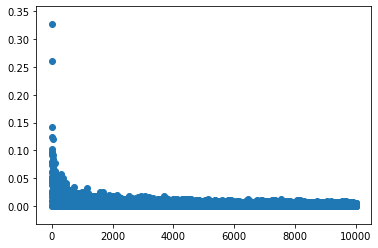

log(n) vs. log(maxError(n))


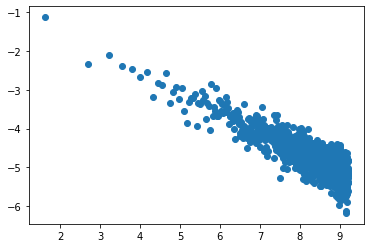

The slope of the log(n) vs. log(error(n)) graph is: 
-0.48270665479671576
The slope of the log(n) vs. log(maxError(n)) graph is: 
-0.5053455068209973
f(x) = e**x
n vs. error(n)


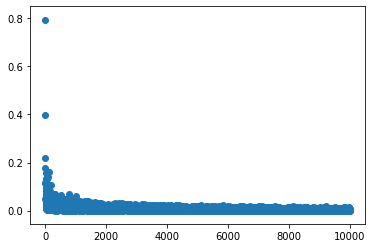

log(n) vs. log(maxError(n))


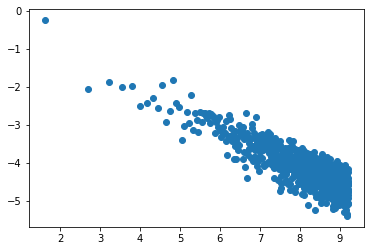

The slope of the log(n) vs. log(error(n)) graph is: 
-0.49825507120493795
The slope of the log(n) vs. log(maxError(n)) graph is: 
-0.4942614716633207
f(x) = cos(x)
n vs. error(n)


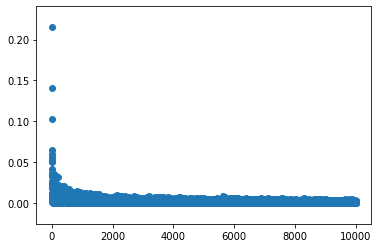

log(n) vs. log(maxError(n))


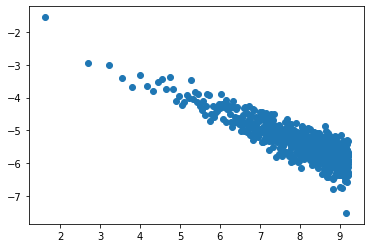

The slope of the log(n) vs. log(error(n)) graph is: 
-0.5078512183619973
The slope of the log(n) vs. log(maxError(n)) graph is: 
-0.49731374773333703


In [8]:
# MCQuad1D tests
# f(x) = x**2 + 1
print("f(x) = x**2 + 1")
errMCQuad1D = np.array([abs(4.0/3 - MCQuad1D(lambda x: x**2 + 1, n + 1)) for n in range(10000)])
print("n vs. error(n)")
plt.scatter([n + 1 for n in range(10000)], errMCQuad1D)
plt.show()

# Choose max pts
maxPts = np.empty(1000)
for i in range(1000):
  maxPts[i] = np.amax(errMCQuad1D[10*i:10*(i + 1)])
print("log(n) vs. log(maxError(n))")
plt.scatter([math.log(5 + 10*n) for n in range(1000)], [math.log(maxPts[n]) for n in range(1000)])
plt.show()

print("The slope of the log(n) vs. log(error(n)) graph is: ")
print(np.polyfit([math.log(n + 1) for n in range(10000)], [math.log(errMCQuad1D[n]) for n in range(10000)], 1)[0])
print("The slope of the log(n) vs. log(maxError(n)) graph is: ")
print(np.polyfit([math.log(5 + 10*n) for n in range(1000)], [math.log(maxPts[n]) for n in range(1000)], 1)[0])

# f(x) = e**x
print("f(x) = e**x")
errMCQuad1D = np.array([abs((math.e - 1) - MCQuad1D(lambda x: math.e**x, n + 1)) for n in range(10000)])
print("n vs. error(n)")
plt.scatter([n + 1 for n in range(10000)], errMCQuad1D)
plt.show()

# Choose max pts
maxPts = np.empty(1000)
for i in range(1000):
  maxPts[i] = np.amax(errMCQuad1D[10*i:10*(i + 1)])
print("log(n) vs. log(maxError(n))")
plt.scatter([math.log(5 + 10*n) for n in range(1000)], [math.log(maxPts[n]) for n in range(1000)])
plt.show()

print("The slope of the log(n) vs. log(error(n)) graph is: ")
print(np.polyfit([math.log(n + 1) for n in range(10000)], [math.log(errMCQuad1D[n]) for n in range(10000)], 1)[0])
print("The slope of the log(n) vs. log(maxError(n)) graph is: ")
print(np.polyfit([math.log(5 + 10*n) for n in range(1000)], [math.log(maxPts[n]) for n in range(1000)], 1)[0])

# f(x) = cos(x)
print("f(x) = cos(x)")
errMCQuad1D = np.array([abs(math.sin(1) - MCQuad1D(lambda x: math.cos(x), n + 1)) for n in range(10000)])
print("n vs. error(n)")
plt.scatter([n + 1 for n in range(10000)], errMCQuad1D)
plt.show()

# Choose max pts
maxPts = np.empty(1000)
for i in range(1000):
  maxPts[i] = np.amax(errMCQuad1D[10*i:10*(i + 1)])
print("log(n) vs. log(maxError(n))")
plt.scatter([math.log(5 + 10*n) for n in range(1000)], [math.log(maxPts[n]) for n in range(1000)])
plt.show()

print("The slope of the log(n) vs. log(error(n)) graph is: ")
print(np.polyfit([math.log(n + 1) for n in range(10000)], [math.log(errMCQuad1D[n]) for n in range(10000)], 1)[0])
print("The slope of the log(n) vs. log(maxError(n)) graph is: ")
print(np.polyfit([math.log(5 + 10*n) for n in range(1000)], [math.log(maxPts[n]) for n in range(1000)], 1)[0])

The method MCQuad2D is tested in an analogous way to the previous method. The three functions are $f_1(x, y) = x^2 + y^2 + 1, f_2(x, y) = e^{(x + y)}, f_3(x, y) = cos(x + y)$, and the three exact integrals of these functions on the reference triangle are $2/3, 1, sin(1) + cos(1) - 1$. Also, for this method we only use $2000$ points maximum instead of $10000$, because the trials with $10000$ points maximum took too long.

f(x, y) = x**2 + y**2 + 1
n vs. error(n)


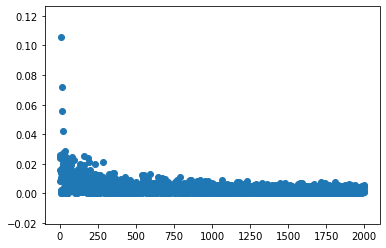

log(n) vs. log(maxError(n))


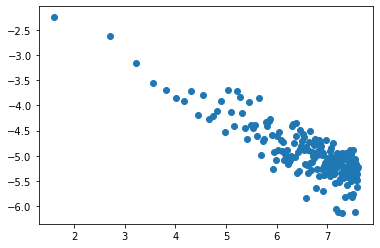

The slope of the log(n) vs. log(error(n)) graph is: 
-0.46301587987338133
The slope of the log(n) vs. log(maxError(n)) graph is: 
-0.49117445512228314
f(x, y) = e**(x + y)
n vs. error(n)


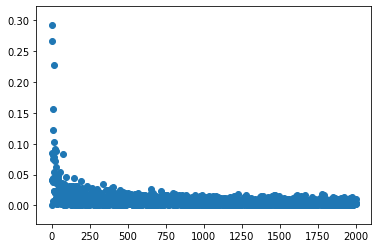

log(n) vs. log(maxError(n))


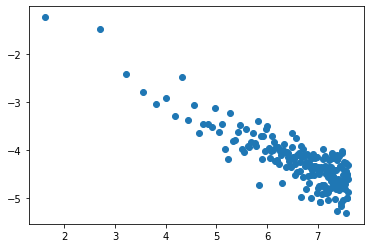

The slope of the log(n) vs. log(error(n)) graph is: 
-0.4840034432068553
The slope of the log(n) vs. log(maxError(n)) graph is: 
-0.5023129964084151
f(x, y) = cos(x + y)
n vs. error(n)


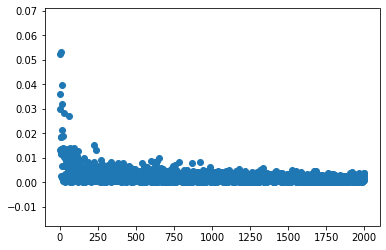

log(n) vs. log(maxError(n))


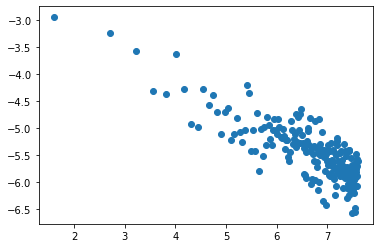

The slope of the log(n) vs. log(error(n)) graph is: 
-0.43876830241019277
The slope of the log(n) vs. log(maxError(n)) graph is: 
-0.4656680863009577


In [9]:
# MCQuad2D tests
# f(x, y) = x**2 + y**2 + 1
print("f(x, y) = x**2 + y**2 + 1")
errMCQuad1D = np.array([abs(2.0/3 - MCQuad2D(lambda x: x[0]**2 + x[1]**2 + 1, n + 1)) for n in range(2000)])
print("n vs. error(n)")
plt.scatter([n + 1 for n in range(2000)], errMCQuad1D)
plt.show()

# Choose max pts
maxPts = np.empty(200)
for i in range(200):
  maxPts[i] = np.amax(errMCQuad1D[10*i:10*(i + 1)])
print("log(n) vs. log(maxError(n))")
plt.scatter([math.log(5 + 10*n) for n in range(200)], [math.log(maxPts[n]) for n in range(200)])
plt.show()

print("The slope of the log(n) vs. log(error(n)) graph is: ")
print(np.polyfit([math.log(n + 1) for n in range(2000)], [math.log(errMCQuad1D[n]) for n in range(2000)], 1)[0])
print("The slope of the log(n) vs. log(maxError(n)) graph is: ")
print(np.polyfit([math.log(5 + 10*n) for n in range(200)], [math.log(maxPts[n]) for n in range(200)], 1)[0])

# f(x, y) = e**(x + y)
print("f(x, y) = e**(x + y)")
errMCQuad1D = np.array([abs(1 - MCQuad2D(lambda x: math.exp(x[0] + x[1]), n + 1)) for n in range(2000)])
print("n vs. error(n)")
plt.scatter([n + 1 for n in range(2000)], errMCQuad1D)
plt.show()

# Choose max pts
maxPts = np.empty(200)
for i in range(200):
  maxPts[i] = np.amax(errMCQuad1D[10*i:10*(i + 1)])
print("log(n) vs. log(maxError(n))")
plt.scatter([math.log(5 + 10*n) for n in range(200)], [math.log(maxPts[n]) for n in range(200)])
plt.show()

print("The slope of the log(n) vs. log(error(n)) graph is: ")
print(np.polyfit([math.log(n + 1) for n in range(2000)], [math.log(errMCQuad1D[n]) for n in range(2000)], 1)[0])
print("The slope of the log(n) vs. log(maxError(n)) graph is: ")
print(np.polyfit([math.log(5 + 10*n) for n in range(200)], [math.log(maxPts[n]) for n in range(200)], 1)[0])

# f(x, y) = cos(x + y)
print("f(x, y) = cos(x + y)")
errMCQuad1D = np.array([abs((math.sin(1) + math.cos(1) - 1) - MCQuad2D(lambda x: math.cos(x[0] + x[1]), n + 1)) for n in range(2000)])
print("n vs. error(n)")
plt.scatter([n + 1 for n in range(2000)], errMCQuad1D)
plt.show()

# Choose max pts
maxPts = np.empty(200)
for i in range(200):
  maxPts[i] = np.amax(errMCQuad1D[10*i:10*(i + 1)])
print("log(n) vs. log(maxError(n))")
plt.scatter([math.log(5 + 10*n) for n in range(200)], [math.log(maxPts[n]) for n in range(200)])
plt.show()

print("The slope of the log(n) vs. log(error(n)) graph is: ")
print(np.polyfit([math.log(n + 1) for n in range(2000)], [math.log(errMCQuad1D[n]) for n in range(2000)], 1)[0])
print("The slope of the log(n) vs. log(maxError(n)) graph is: ")
print(np.polyfit([math.log(5 + 10*n) for n in range(200)], [math.log(maxPts[n]) for n in range(200)], 1)[0])

# **Discussion**

The author is surprised with the simplicity of the Gaussian quadrature method (at least in 1D), and how it shows that *things that behave well with polynomials also behave well with more general functions*. After a bit of reading, the author is also surprised with the simplicity and extremely wide applicability of the Monte Carlo-type methods, especially in higher dimensions.

All results were favorable. The $maxError(n)$ function defined in the tests for the last two methods was unnecessary, as both it and $error(n)$ showed the desired tendency. 

The author collaborated with Felipe Vicencio.

The lecture notes were extensively used while writing this lab report.